# Определение перспективного тарифа для телеком компании

### Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. **Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов

**Тариф «Смарт»
-**
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля 
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей
**«Мегалайн» всегда округляет вверх значения минут и мегабайтов. 
Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.


**Тариф «Ультра»
-**
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей
***
**Источник данных:
Собственные данные компании «Мегалайна» по 500 пользователям за 2018 год: 
кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил 
-***
Путь к файлам:
/datasets/calls.csv
/datasets/internet.csv
/datasets/messages.csv
/datasets/tariffs.csv
/datasets/users.csv

**Описание данных**
***
**Таблица users (информация о пользователях):**\
user_id — уникальный идентификатор пользователя
first_name — имя пользователя
last_name — фамилия пользователя
age — возраст пользователя (годы)
reg_date — дата подключения тарифа (день, месяц, год)
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
city — город проживания пользователя
tariff — название тарифного плана
***
**Таблица calls (информация о звонках):**\
id — уникальный номер звонка
call_date — дата звонка
duration — длительность звонка в минутах
user_id — идентификатор пользователя, сделавшего звонок
***
**Таблица messages (информация о сообщениях):**\
id — уникальный номер сообщения
message_date — дата сообщения
user_id — идентификатор пользователя, отправившего сообщение
***
**Таблица internet (информация об интернет-сессиях):**\
id — уникальный номер сессии
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
session_date — дата интернет-сессии
user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**\
tariff_name — название тарифа
rub_monthly_fee — ежемесячная абонентская плата в рублях
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
messages_included — количество сообщений в месяц, включённых в абонентскую плату
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
rub_per_message — стоимость отправки сообщения сверх тарифного пакета
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [1]:
# Загрузка необходимых библиотек и настройка окружения
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

# Настройка окружения
pd.options.display.width = 160
pd.options.display.max_columns = None
pd.options.display.float_format = '{0:.2f}'.format

### Шаг 1. Открытие файла с данными и изучение общей информации

In [34]:
# Первое "знакомство" и оценка исходных данных:
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

for view in [df_calls, df_internet, df_messages, df_users]:
    display(view.head(3))
    print('Число записей:', view.shape[0])
    print()
df_tariffs   # методом print "красивого" вывода добиться не удалось 

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


Число записей: 202607



,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000


Число записей: 149396



,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


Число записей: 123036



,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


Число записей: 500



,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Шаг 2. Подготовка данных
Приведите данные к нужным типам;
Найдите и исправьте ошибки в данных.
Поясните, какие ошибки вы нашли и как их исправили. 
Обратите внимание, что у большого количества звонков длительность — 0.0 минут. Это проблема в данных, нужна предобработка.

Посчитайте для каждого пользователя:
- calls - количество сделанных звонков и израсходованных минут разговора по месяцам;
- messages - количество отправленных сообщений по месяцам;
- internet - объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя 

План:
1. Проверка и исправление проблем в данных
2. Группировка данных помесячно, расчет необходимых значений
3. Объединение таблицы 'calls, internet, messages'  в одну
4. Расчет помесячной выручки по данным итоговой таблицы 
(вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана).

In [36]:
# вывод информации по типам данных в таблицах
for view in [df_calls, df_internet, df_messages, df_users, df_tariffs]:
    display(view.info())
   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

##### Преобразование форматов данных

In [4]:
# преобразование df_calls['call_date'], df_internet['session_date'], df_messages['message_date'] в формат datetime:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

# преобразование df_users ['reg_date'], ['churn_date'] в формат datetime:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

# столбцы df_calls['call_date'], df_internet['session_date'], df_messages['message_date'] содержат дату события 
# поскольку группировка будет осуществляться в последующем по этим данным
# перед объединением переименовываем столбцы в 'activity_date'
df_calls.rename({'call_date':'activity_date'}, axis=1, inplace=True)
df_internet.rename({'session_date' : 'activity_date'}, axis=1, inplace=True)
df_messages.rename({'message_date' : 'activity_date'}, axis=1, inplace=True)

##### Выявление и исправление ошибок в данных

##### df_calls

In [5]:
# Проверка записей с нулевой продолжительность звонков
print('Число записей с продолжительностью звонка равной 0.0 :', df_calls.query('duration == 0').shape[0])

Число записей с продолжительностью звонка равной 0.0 : 39613


**«Мегалайн» всегда округляет вверх значения минут и мегабайтов.
(осталось неясным - для обоих тарифов или только для "Смарт")
Считаем, что данное правило действует для обоих тарифов 
Если пользователь проговорил всего 1 секунду, по тарифу засчитывается целая минута.

In [6]:
# замена значений продолжительности разговора 0.0 на 1 мин в соответствии с правилами тарифа 
# метод np.ceil() в данном случае не подходит, поскольку значения 0, останутся 0.
# округляем продолжительность звонков до целого в большую сторону
df_calls['duration'] = df_calls['duration'].apply(lambda duration: int(duration) + 1)

# преобразование в целочисленный формат
df_calls['duration'] = df_calls['duration'].astype(int, errors='ignore')

# проверка:
print('Число записей с продолжительностью звонка равной 0.0 :', df_calls.query('duration == 0').shape[0])
df_calls.head()

Число записей с продолжительностью звонка равной 0.0 : 0


,id,activity_date,duration,user_id
0,1000_0,2018-07-25,1,1000
1,1000_1,2018-08-17,1,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [7]:
# провера разброса в данных по продолжительности звонков:
df_calls['duration'].describe()

count   202607.00
mean         7.36
std          5.74
min          1.00
25%          2.00
50%          7.00
75%         11.00
max         39.00
Name: duration, dtype: float64

**Выводы:**
Медиана и среднее близки: 7.36 мин и  7.00 мин, значит существенных выбросов нет.
Максималное значение 39 мин разговора вполне возможно. 
Минимальное значение продолжительности звонка стало 1 мин, значит обработка данных прошла успешно.
Данные готовы для анализа. 

##### df_internet

In [8]:
# По правилам тарифов округление мегабайтов производится в большую сторону до целого
# округляем данные по использованным мегабайтам
df_internet['mb_used'] = df_internet['mb_used'].apply(lambda mb: int(mb) + 1)

In [9]:
df_internet['mb_used'].describe()
# медиана и среднее достаточно близки 348 и 370, данные правдоподобны

count   149396.00
mean       370.76
std        278.21
min          1.00
25%        139.00
50%        349.00
75%        560.00
max       1725.00
Name: mb_used, dtype: float64

**Выводы:
Медиана и среднее близки: 370 Мб и  349 Мб, значит существенных выбросов нет.
Минимальное значение трафика данных стало 1 Мб, значит обработка данных прошла успешно.
Данные готовы для анализа. 

##### df_messages
данные по смс в таблице бинарны - фиксируется только факт отправки, 
обработка и анализ будут проводится после объединения и группировки данных.

##### df_users

In [10]:
# проверка возможных ошибок в категорях тарифов:
# PS: все в порядке
df_users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

In [11]:
# проверка возможных ошибок в названиях городов:
df_users['city'].value_counts().head(7)
# задача стоит о проверке статистики по г.Москва и остальным регионам, делаем проверку по возможным написаниям 'Москва'
# PS: все в порядке, категория имеет однотипное написание в данных
df_users.query('city == "Москва" or city == "москва"').city.value_counts()

Москва    99
Name: city, dtype: int64

##### Объединение таблиц

In [12]:
# добавление столбца month в исходные таблицы:
df_calls['month'] = pd.DatetimeIndex(df_calls['activity_date']).month
df_internet['month'] = pd.DatetimeIndex(df_internet['activity_date']).month
df_messages['month'] = pd.DatetimeIndex(df_messages['activity_date']).month

# группировка и подсчет целевых данных:
df_activity = pd.DataFrame(columns = ['month', 'duration', 'mb_used', 'user_id'])
for month in range(1, 13):
    df_activity = df_activity.append(
        df_calls.loc[df_calls['month'] == month].groupby('user_id').agg({'month':'min', 'duration':'sum'}), sort=False)

for month in range(1, 13):
    df_activity = df_activity.append(
        df_internet.loc[df_internet['month'] == month].groupby('user_id').agg({'month':'min', 'mb_used':'sum'}), sort=False)

# на данный момент столбец 'user_id' - для подсчета количества смс:
for month in range(1, 13):
    df_activity = df_activity.append(
        df_messages.loc[df_messages['month'] == month].groupby('user_id').agg({'month':'min', 'user_id':'count'}), sort=False)

# реиндексация
df_activity.reset_index(inplace=True)
# переименование 'user_id' в  'messages', как более соотвествующее смыслу,
# переименовываем  'index' в 'user_id' 
df_activity.rename({'user_id':'messages', 'index':'user_id'}, axis=1, inplace=True)

# проверка результата для выборочного id = 1005:
# df_activity.query('user_id == 1005 and (month == 1 or month == 12) ') 
# данные по всем видам услуг и для крайних диапазонов значения месяца присутствуют, можно группировать в окончательную таблицу

In [13]:
# группировка всех видов услуг в помесячном формате для каждого клиента:
df_activity_final = pd.DataFrame(columns = ['month', 'duration', 'mb_used', 'messages'])
for month in range(1, 13):
    df_activity_final = df_activity_final.append(
        df_activity.loc[df_activity['month'] == month].groupby('user_id')
        .agg({'month':'min', 'duration':'sum', 'mb_used': 'sum', 'messages':'sum'}))

df_activity_final.reset_index(inplace=True)
df_activity_final.rename({'index' : 'user_id'}, axis=1, inplace=True)
# проверка результата для выборочного id = 1005:
# df_activity_final.query('user_id == 1005')

In [14]:
# Объединение таблицы со статитстикой по испоьзованию услуг с таблицой персональных данных клиентов
# ФИО клиентов не переносим, для исследования в них нет необходимости и их можно узнать по id
df_activity_final = pd.merge(
    df_activity_final, df_users[['user_id','tariff', 'age', 'city', 'reg_date', 'churn_date']], left_index=True, on = 'user_id')

In [15]:
# после merge появился "дублер" индексов, обновляем эти данные
df_activity_final.reset_index(inplace=True)
del df_activity_final['index']

In [16]:
# проверка итоговой таблицы после слияния
# успешно: размер таблицы сохранился, данные в порядке
#df_activity_final.info()
#df_activity_final.tail(10)
df_activity_final.shape[0]

3214

##### Расчет помесячной выручки с каждого пользователя

In [17]:
# Таблица действующих тарифов для расчетов
df_tariffs

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [18]:
# функция mtz (minus_to_zero) возвращает значение '0' если число отрицательное
def mtz(x):
    if x > 0:
        return(x)
    else:
        return(0)
    
# функция расчета месячного платежа абонента в зависимости от тарифа 
# для интернета расчет трафика указан в таблицах в Мб, для расчета тарифа цена идет за Гб. 
# делим сверхлитный трафик на 1024 для перевода Мб в Гб

def income(tariff, duration, mb_used, messages):
    try:
        return (
            (mtz(duration - df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'minutes_included'].iloc[0]) 
            * df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'rub_per_minute'].iloc[0])
            + (mtz(mb_used - df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'mg_per_month_included'].iloc[0]) 
               / 1024 # Делим сверхлитный трафик на 1024 для перевода Мб в Гб
            * df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'rub_per_gb'].iloc[0])
            + (mtz(messages - df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'messages_included'].iloc[0]) 
            * df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'rub_per_message'].iloc[0])
            + df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'rub_monthly_fee'].iloc[0] # ставка месячной абонентской платы
        )
    except:
        return (np.nan)

**К расчету размера выручки добавлена ставка ежемесячной абонентской платы, поскольку ее доля значительна, а включенный объем предоплаченных услуг может перекрывать их реальное потребелние клиентами.

In [19]:
# перед расчетом выручки по каждому клиенту приводим к целочисленному формату все используемые
# в расчетах данные ('duration' и 'mb_used' - повторно, поскольку метод info() выдает по этим стобцам dtype - object)
df_activity_final['duration'] = df_activity_final['duration'].astype(int, errors='ignore')
df_activity_final['mb_used'] = df_activity_final['mb_used'].astype(int, errors='ignore')
df_activity_final['messages'] = df_activity_final['messages'].astype(int, errors='ignore')

In [20]:
# производим расчет платежей по каждому абоненту согласно правилам тарифа 
df_activity_final['income'] = df_activity_final.apply(
    lambda row: income(row['tariff'], row['duration'], row['mb_used'], row['messages']), axis=1)

In [21]:
# после многочисленных группировок часть данных в таблице имела тип object
# повторная проверка типа данных перед началом анализа
df_activity_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 11 columns):
user_id       3214 non-null int64
month         3214 non-null object
duration      3214 non-null int64
mb_used       3214 non-null int64
messages      3214 non-null int64
tariff        3214 non-null object
age           3214 non-null int64
city          3214 non-null object
reg_date      3214 non-null datetime64[ns]
churn_date    187 non-null datetime64[ns]
income        3214 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(5), object(3)
memory usage: 276.3+ KB


In [22]:
df_activity_final['income'].value_counts(bins=5)

(543.78, 1793.706]      1734
(1793.706, 3037.412]    1366
(3037.412, 4281.119]      99
(4281.119, 5524.825]      11
(5524.825, 6768.531]       4
Name: income, dtype: int64

### Шаг 3. Анализ данных
Опишите поведение клиентов оператора, исходя из выборки. 
Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

##### Расчет количества, среднего, стандартного отклонения, квартилей и дисперсии.

In [23]:
df_stat = pd.DataFrame(index = list(df_activity_final.duration.describe().index))
for val in ['duration', 'mb_used', 'messages']:    
    df_stat[str(val + '-smart')] = list(df_activity_final.query('tariff == "smart" ')[val].describe())
    df_stat[str(val + '-ultra')] = list(df_activity_final.query('tariff == "ultra" ')[val].describe())
# расчет дисперсии как квадрата стандартного отклонения 'std':
df_stat.loc['variance'] = df_stat.loc['std'] ** 2
df_stat

,duration-smart,duration-ultra,mb_used-smart,mb_used-ultra,messages-smart,messages-ultra
count,2229.00,985.00,2229.00,985.00,2229.00,985.00
mean,429.91,541.32,16237.62,19489.08,33.38,49.36
std,195.06,326.02,5879.96,10097.31,28.23,47.80
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,291.00,292.00,12662.00,11787.00,10.00,6.00
50%,435.00,532.00,16540.00,19324.00,28.00,38.00
75%,561.00,773.00,20079.00,26869.00,51.00,79.00
max,1473.00,1728.00,38628.00,49793.00,143.00,224.00
variance,38049.70,106291.43,34573951.90,101955627.78,796.81,2285.27


**Первые выводы
-***
Число абонентов на тарифе ultra и smart составляет 31% и 69% от общего числа соответственно.
Для пользователей ultra характерен значительно больший разброс в объеме потребляемых услуг, стандартное отклонение от средних показателей в 1.7 раза выше чем для smart по всем трем видам услуг.
В среднем объем потребляемых услуг у ultra незначительно отличается от smart: по медиане длительности разговоров 22%, потребляемому трафику интернет - 17%, числу сообщений - 36%.
Первый квартиль объема услуг по тарифу ultra лежит в границах предоплаченного объема услуг тарифа smart. 
Это не значит, что 25% абонентов ultra смогут войти в объем предоплаченного объема smart, поскольку статистика по месацам может отличаться и малое потребление одной услуги абонентом может сочетаться с большим потрблением другой. Тем не менее, реальная потребность в объеме потребляемых услуг у клиентов ultra превышает объем аналогичных услуг потребляемых клиентами smart до 22% по длительности разговоров и интернет трафику, а объем предоплаченных услуг в тарифе Ultra отличается от Smart в 6 раз по продолжительности разговоров (3000 мин и 500 мин) и в 2 раза по объему интернет трафика (30720 МБ и 15360 Мб)

In [24]:
# проверим гипотезу о пересечении потребности объема  услуг в тарифе ultra с тарифом smart
# заданы граничные условия, когда все три услуги в пределах месяца, укладываются в  предоплаченный лимит по тарифу smart
(df_activity_final.query(
    'tariff == "ultra" and  duration > 500 and mb_used > 15360 and messages > 50').shape[0]
    / df_activity_final.query('tariff == "ultra"').shape[0])

0.16852791878172588

**Почти в 17% случаев месячная потребность в физическом объеме услуг пользователей ultra находится в пределах предоплаченного объма услуг на smart.

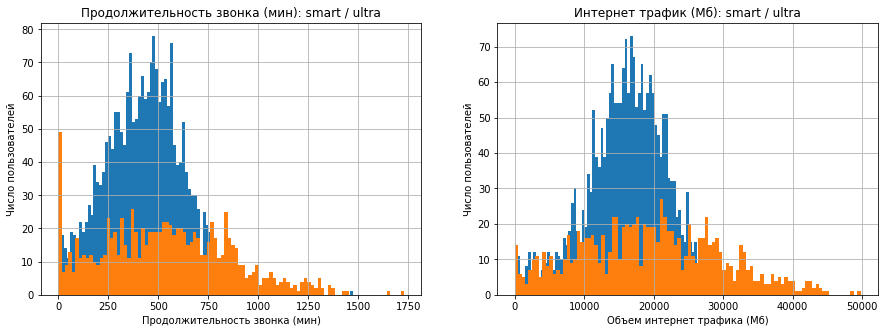

In [40]:
# построение графиков распределения по частоте/объему услуги
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
df_activity_final.loc[df_activity_final['tariff'] == 'smart'].duration.hist(bins=100, ax=axs[0])
df_activity_final.loc[df_activity_final['tariff'] == 'ultra'].duration.hist(bins=100, ax=axs[0])
df_activity_final.loc[df_activity_final['tariff'] == 'smart'].mb_used.hist(bins=100, ax=axs[1])
df_activity_final.loc[df_activity_final['tariff'] == 'ultra'].mb_used.hist(bins=100, ax=axs[1])
axs[0].set_title('Продолжительность звонка (мин): smart / ultra')
axs[0].set_xlabel('Продолжительность звонка (мин)')
axs[0].set_ylabel('Число пользователей')
axs[1].set_title('Интернет трафик (Мб): smart / ultra');
axs[1].set_xlabel('Объем интернет трафика (Мб)')
axs[1].set_ylabel('Число пользователей');

***
## Комментарий наставника

Хорошо, что добавил заголовки графиков, классно было бы еще добавить легенду и подписи осей
***

Вывод: визуально распределение объема потребляемого клиентами интернет трафика напоминает нормальное, при этом распределение для тарифа ultra не имееет такого выраженного пика как у smart и имеет более пологую харатеристику.
Этот вывод также подтверждается статистикой полученной методом describe: стадндартное отклоненение для распределений по объему интернет трафика для smart и ultra составляют соответственно 5879.96 и 10097.31, т.е. почти двукратная разница разброса.
Для распределения по продолжительности звонка характерна ассиметрия распределения, более длинное правое плечо, данное распределение ближе форме к распределению Пуассона, чем к нормальному.

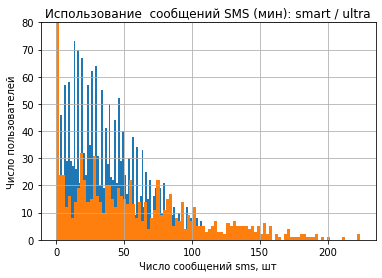

In [43]:
plt.ylim(0, 80)
df_activity_final.loc[df_activity_final['tariff'] == 'smart'].messages.hist(bins=100)
df_activity_final.loc[df_activity_final['tariff'] == 'ultra'].messages.hist(bins=100)
plt.title('Использование  сообщений SMS (мин): smart / ultra')
plt.xlabel('Число сообщений sms, шт')
plt.ylabel('Число пользователей');

**Вывод:** визуально распределение объема сообщений отправляемых клиентами близко к распределению Пуассона.

**Выводы по гистограммам распределения.**\
Ближе всего к распределению гаусса объем интернет трафика клиентов для обоих тарифов, распределение для отправленных сообщений напоминает распределение Пуассона, форма распределения для продолжительности звонков имеет переходную форму.
Распределения для тарифа ultra имеют более пологую форму, распределение для тарифа smart имеет более выраженный пик.
***
Почти в 17% случаев потребляемый пользователями тарифа Ultra объем услуг находится в пределах предоплаченного пакета услуг для Smart.
***
Объем услуг включенных в предоплаченный пакет по тарифу ultra значительно превышает реальную потребность клиентов.
Реальная потребность в объеме потребляемых услуг у клиентов ultra превышает объем аналогичных услуг потребляемых клиентами smart на 22% по интернет трафику и длительности разговоров, а объем предоплаченных услуг в тарифе Ultra отличается от Smart в 2 раза по объему интернет трафика (30720 МБ и 15360 Мб) и в 6 раз по продолжительности разговоров (3000 мин и 500 мин)
***
Согласно статистической теории при увеличении числа наблюдений распределение Пуассона стремится к нормальному. То есть, чем ближе характеристики распределения для конкретной услуги к нормальному, тем чаще этой услугой полузуются, тем более она востребована. Можно предположить, что наиболее востребованной услугой на момент исследования явлется предоставление интернет трафика, это стало более важно чем просто услуга мобильной связи и наименьшая потребность у клиентов в сервисе отправки сообщений.

### Шаг 4. Проверка гипотез
***
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается; 
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов; 
***
Пороговое значение alpha задайте самостоятельно. 
Поясните: 
- как вы формулировали нулевую и альтернативную гипотезы; 
- какой критерий использовали для проверки гипотез и почему.

#### 1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» 

**Гипотеза:
H0 - средняя выручка  по пользователям тарифов «Ультра» и «Смарт» равны
H1 - средняя выручка  по пользователям тарифов «Ультра» и «Смарт» не равны друг другу.
***
уровень значимости принимаем alfa = 5% (5e-2)

In [27]:
# оценка датасетов по тарифам
df_stat = pd.DataFrame(index = list(df_activity_final.income.describe().index))
df_stat['smart'] = list(df_activity_final.query('tariff == "smart" ').income.describe())
df_stat['ultra'] = list(df_activity_final.query('tariff == "ultra" ').income.describe())
df_stat

,smart,ultra
count,2229.00,985.00
mean,1252.19,2060.61
std,798.08,356.46
min,550.00,1950.00
25%,553.00,1950.00
50%,988.00,1950.00
75%,1705.08,1950.00
max,6768.53,4743.90


В статистике выручки по тарифам сразу видна видна принципиальная разница, для тарифа ultra первые три квартиля клиентов полностью покрывают свои потребности услугами входящими в предоплаченный пакет. Среднее плата за доп. услуги для smart - 702 р. для ultra - 110 р., разница семикратная. 

Text(0.5, 1.0, 'ultra')

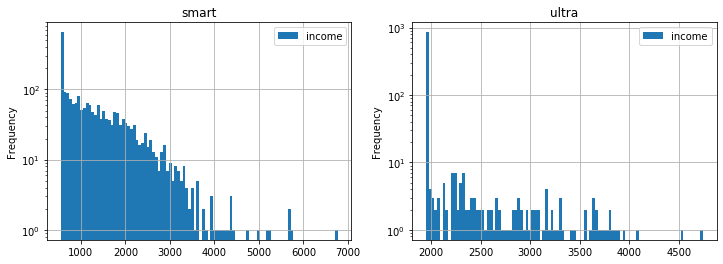

In [28]:
# визуальная оценка формы распределения выручки от клиентов по тарифам
# поскольку разброс частот очень большой используем логарифмическую шкалу графиков
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
df_activity_final.loc[df_activity_final['tariff'] == 'smart'].plot(y='income', kind='hist', bins=100, ax=axs[0], grid=True)
df_activity_final.loc[df_activity_final['tariff'] == 'ultra'].plot(y='income', kind='hist', bins=100, ax=axs[1], grid=True)
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].set_title('smart')
axs[1].set_title('ultra')

Визуально оба распределения далеки от гауссовского, причем для тарифа ultra это особенно выражено. 
Если для smart можно предположить возможность распределения Пуассона, то для Ultra после пика, когда оплата не выходит за рамки абонентской платы, распределение равномерное вплоть до 4000 руб.
Выполняем проверку этих выборок также статистическими методами.
Наиболее популярен для подобной проверки тест д'Агостино (на соответствие выборки нормальному закону распределения)
**Гипотезы:
H0 - выборка значений выручки по тарифу имеет гауссово распределение
H1 - выборка значений выручки по тарифу не имеет гауссовского распределения

In [29]:
print('Тест дАгостино на соответствие выборки нормальному закону распределения:')
print('Тариф smart:', st.normaltest(df_activity_final.loc[df_activity_final['tariff'] == 'smart'].income))
print('Тариф ultra:', st.normaltest(df_activity_final.loc[df_activity_final['tariff'] == 'ultra'].income))

Тест дАгостино на соответствие выборки нормальному закону распределения:
Тариф smart: NormaltestResult(statistic=682.0977864646997, pvalue=7.662096369292467e-149)
Тариф ultra: NormaltestResult(statistic=803.7052840524709, pvalue=3.003412816912251e-175)


**Вывод: стандартный критерий значимости при анализе составляет 5е-2, в нашем случае полученный критерий значимости отличается более чем на 100 порядков. Для smart и ultra соответственно: 7e-149 и 3e-175.
Нулевую гипотезу отвергаем. Выборки по значениям выручки от абонентов не имеют гауссовского распределения.

Для сравнения среднего выборок не имеющих нормального распределения рекомендуется использовать U-критерий Манна — Уитни
https://malev.ru/shpargalka-po-statisticheskomy-analizu/



In [30]:
u, p_value = st.mannwhitneyu(df_activity_final.loc[df_activity_final['tariff'] == 'smart'].income
                             , df_activity_final.loc[df_activity_final['tariff'] == 'ultra'].income)
print('U-критерий Манна — Уитни', p_value)

U-критерий Манна — Уитни 8.144798620231045e-208


**Вывод: Нулевая гипотеза о равенстве средних не подтвердилась, 
p_value = 8e-208 при принятом уровне значимости alfa = 5% (5e-2)
Принимаем гипотезу H1: средняя выручка  по пользователям тарифов «Ультра» и «Смарт» не равны друг другу

#### 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов; 

In [31]:
# оценка датасетов по регионам
df_stat = pd.DataFrame(index = list(df_activity_final.income.describe().index))
df_stat['Москва'] = list(df_activity_final.query('city == "Москва" ').income.describe())
df_stat['Регионы'] = list(df_activity_final.query('city != "Москва" ').income.describe())
df_stat

,Москва,Регионы
count,611.00,2603.00
mean,1518.26,1495.65
std,741.07,797.60
min,550.00,550.00
25%,767.47,705.81
50%,1733.59,1545.90
75%,1950.00,1950.00
max,5232.14,6768.53


**Гипотеза:
H0 - средняя выручка от пользователей из Москвы и от пользователей из регионов равны
H1 - средняя выручка от пользователей из Москвы и от пользователей из регионов равны не равны друг другу.
***
уровень значимости принимаем alfa = 5% (5e-2)

In [32]:
# Выполняем проверку выборок по критерию д'Агостино (на соответствие выборки нормальному закону распределения)
#Гипотезы:
#H0 - выборка значений выручки по тарифу имеет гауссово распределение
#H1 - выборка значений выручки по тарифу не имеет гауссовского распределения
print('Тест дАгостино на соответствие выборки нормальному закону распределения:')
print('Тариф smart:', st.normaltest(df_activity_final.loc[df_activity_final['city'] == 'Москва'].income))
print('Тариф ultra:', st.normaltest(df_activity_final.loc[df_activity_final['city'] != 'Москва'].income))

Тест дАгостино на соответствие выборки нормальному закону распределения:
Тариф smart: NormaltestResult(statistic=25.099006782188702, pvalue=3.5466630193635585e-06)
Тариф ultra: NormaltestResult(statistic=352.08973319978406, pvalue=3.504982615814169e-77)


Вывод: стандартный критерий значимости при анализе составляет 5е-2, в нашем случае полученный критерий значимости отличается более чем на 100 порядков. Для smart и ultra соответственно: 1.5e-52 и 1e-216.
Нулевую гипотезу отвергаем. Принимаем H1: Выборки по значениям выручки от абонентов из разных регионов не имеют гауссовского распределения.

Для сравнения среднего выборок не имеющих нормального распределения используем U-критерий Манна — Уитни:

In [33]:
u, p_value = st.mannwhitneyu(df_activity_final.loc[df_activity_final['city'] == 'Москва'].income
                             , df_activity_final.loc[df_activity_final['city'] != 'Москва'].income)
print('U-критерий Манна — Уитни', p_value)

U-критерий Манна — Уитни 0.15009450789106138


**Вывод: Нулевая гипотеза о равенстве средних не подтвердилась, 
p_value = 15% при принятом уровне значимости alfa = 5% 
Гипотеза H0 подтвердилась: средняя выручка  по пользователям из Москвы и регионов могут быть равны друг другу

### Шаг 5. Общий вывод

##### Основные выводы :
Рапределение выборок по выручке проверено на соответствие нормальному распределению по методу  д'Агостино. 
Поскольку соответствие нормальной форме распределения не подтвердилось,
принято решения для анализа взаимосвязи выборок использовать метод Манна — Уитни.
***
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» отличаются друг от друга
**Выдвинута гипотеза:
H0 - средняя выручка  по пользователям тарифов «Ультра» и «Смарт» равны
H1 - средняя выручка  по пользователям тарифов «Ультра» и «Смарт» не равны друг другу.
уровень значимости принят alfa = 5% (5e-2)
***
Вывод: Средняя выручка  по пользователям тарифов «Ультра» и «Смарт» не равны друг другу
Нулевая гипотеза о равенстве средних не подтвердилась: 
p_value = 8e-208 при принятом уровне значимости alfa = 5% (5e-2)
Принимаем гипотезу H1: средняя выручка  по пользователям тарифов «Ультра» и «Смарт» не равны друг другу
***
***
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов; 
**Выдвинута гипотеза:
H0 - средняя выручка от пользователей из Москвы и от пользователей из регионов равны
H1 - средняя выручка от пользователей из Москвы и от пользователей из регионов равны не равны друг другу.
уровень значимости принят alfa = 5% (5e-2)
***
**Вывод: Средняя выручка от пользователей из Москвы и регионов могут быть равны друг другу
Нулевая гипотеза о равенстве средних подтвердилась 
p_value = 15% при принятом уровне значимости alfa = 5% 


##### Дополнительные выводы
**Выводы по гистограммам распределения.
Ближе всего к распределению Гаусса распределение объема интернет трафика для клиентов обоих тарифов. Распределение для отправленных сообщений напоминает распределение Пуассона, форма распределения для продолжительности звонков имеет переходную форму.
Распределения для тарифа Ультра имеют более пологую форму. Распределение для тарифа Смарт имеет выраженный пик.
***
Почти в 17% случаев потребляемый пользователями тарифа Ультра объем услуг находится в пределах предоплаченного пакета услуг для Смарт.
***
Объем услуг включенных в предоплаченный пакет по тарифу Ультра значительно превышает реальную потребность клиентов.
Потребление услуг у клиентов Ультра превышает объем аналогичных услуг потребляемых клиентами Смарт: на 17% по интернет трафику и 22% длительности разговоров. При этом объем предоплаченных услуг в тарифе Ультра отличается от Смарт в 2 раза по объему интернет трафика (30720 МБ и 15360 Мб) и в 6 раз по продолжительности разговоров (3000 мин и 500 мин)
***
Согласно статистической теории, при увеличении числа наблюдений (в нашем случае частоты) распределение Пуассона стремится к нормальному. 
Исходя из формы распределения можно предположить, что наиболее востребованной услугой на момент исследования явлется предоставление интернет трафика, это стало более важно чем услуга мобильной связи,  а сервис отправки сообщений имеет наименьшую значимость для клиентов.